In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import gpflow
import gpitch
import time
from gpitch.myplots import plotgp
import tensorflow as tf

In [3]:
plt.rcParams["figure.figsize"] = (15, 5)
gpitch.init_settings('1');

In [4]:
x = np.linspace(0., 0.1, 1600).reshape(-1, 1)
z = x[::40].copy()
z.shape

(40, 1)

In [5]:
k1 = gpitch.kernels.Env(input_dim=1, z=z)
k2 = gpflow.kernels.RBF(input_dim=1, lengthscales=0.001, variance=0.25)
kern = k1*k2

In [6]:
envelope = np.exp(-20000*(x-0.02)**2) + np.exp(-20000*(x-0.07)**2) + np.exp(-40000*(x-0.06)**2)

In [7]:
y = envelope*(0.33*np.cos(2*np.pi*180*x) + 0.33*np.cos(2*2*np.pi*180*x) + 
              0.33*np.cos(3*2*np.pi*150*x)) + np.sqrt(0.001)*np.random.randn(x.size,1)

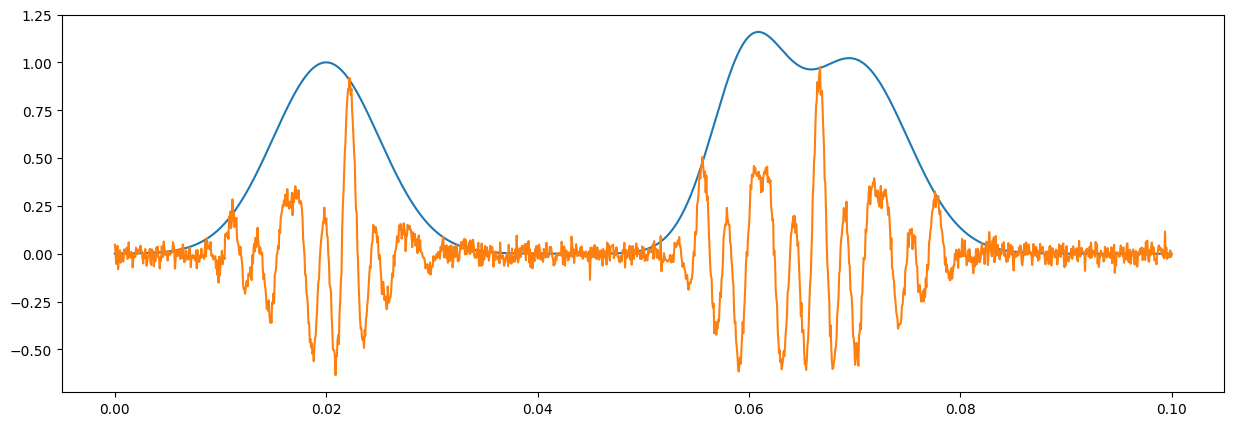

In [8]:
plt.plot(x, envelope);
plt.plot(x, y);

In [9]:
m = gpflow.svgp.SVGP(X=x, Y=y, kern=kern, Z=x[::10].copy(), likelihood=gpflow.likelihoods.Gaussian())

m.Z.fixed = 1
m.kern.env.z.fixed = 1
m.optimize(disp=1, maxiter=500);

m.Z.fixed = 0
m.kern.env.z.fixed = 0
m.optimize(disp=1, maxiter=1000);

In [10]:
mean, var = m.predict_y(x)

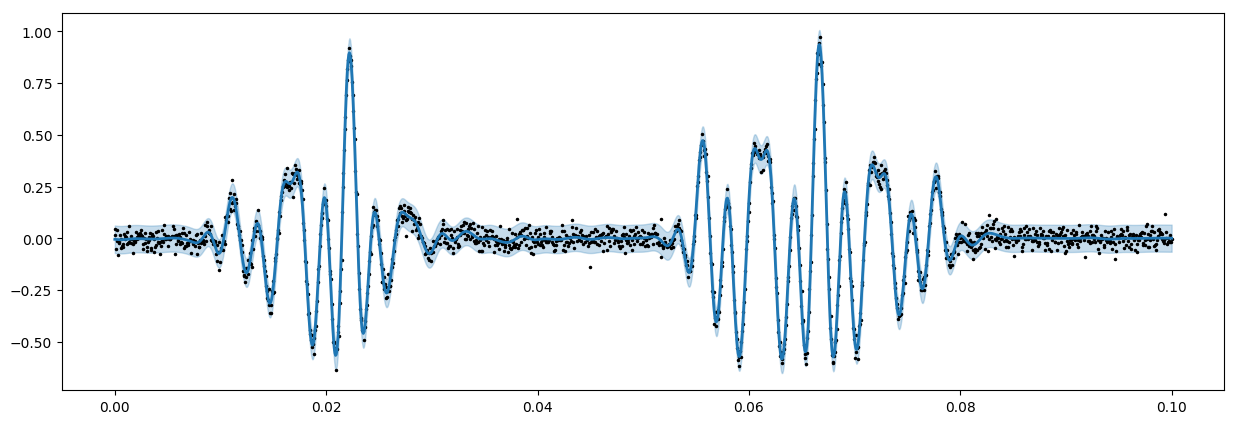

In [11]:
plotgp(x=x, y=y, xnew=x, mean=mean, variance=var)

In [12]:
K2 = m.kern.compute_K_symm(x)

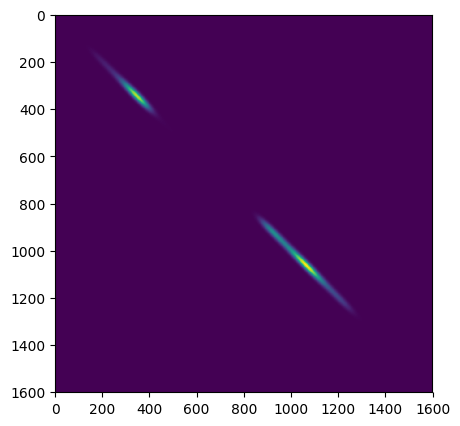

In [13]:
plt.imshow(K2)

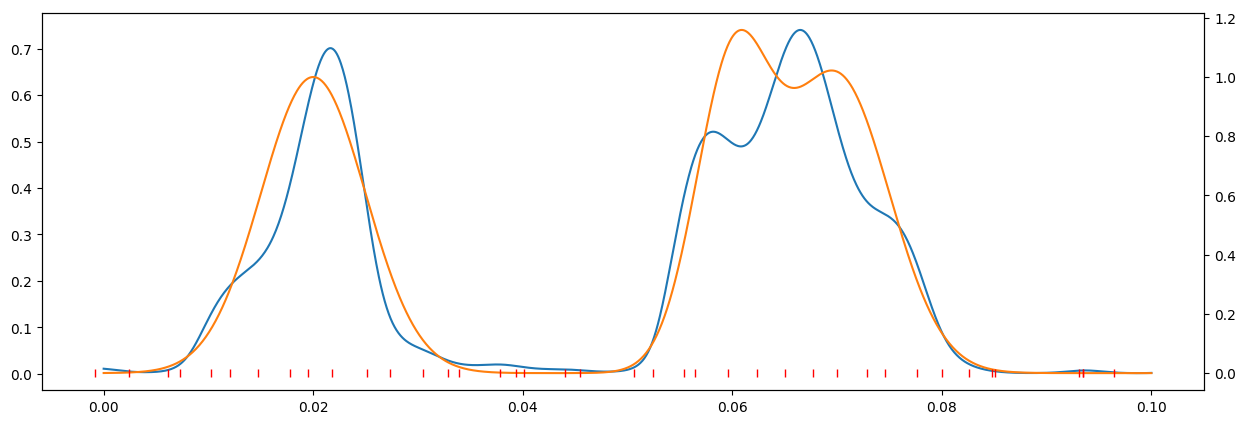

In [14]:
plt.plot(x, np.sqrt(np.diag(K2)))
plt.twinx()
plt.plot(x, envelope, 'C1');
plt.plot(m.kern.env.z.value, 0*m.kern.env.z.value, '|r');
# plt.xlim(0., 0.1)

In [15]:
m.kern

Name,values,prior,constraint
kern.env.kernel.lengthscales,[ 0.00411802],None,+ve
kern.env.kernel.variance,[ 0.42832024],None,+ve
kern.env.u,[[-2.72903924] [-3.5487688 ] [-3.32732112] [-1.80273198] [-0.07568345] [ 0.67523386] [ 1.10695817] [ 2.00286947] [ 3.3928733 ] [ 3.73503676] [ 1.93546943] [-0.15137922] [-1.05198294] [-1.67123885] [-2.17972138] [-2.10379868] [-2.21567671] [-2.64204172] [-2.90518569] [-3.14527584] [-2.5969869 ] [-0.57117755] [ 1.72317175] [ 2.78646961] [ 2.67261259] [ 2.87180599] [ 3.82329151] [ 3.9497888 ] [ 2.84551984] [ 1.9733555 ] [ 1.69220784] [ 1.03294839] [-0.46425782] [-2.11313277] [-3.20422493] [-3.61985638] [-3.41755062] [-3.05811646] [-3.16851125] [-4.17358266]],None,(none)
kern.env.z,[[-0.00086775] [ 0.00245525] [ 0.00616383] [ 0.00729242] [ 0.01027206] [ 0.01206948] [ 0.01477647] [ 0.01779554] [ 0.01953599] [ 0.02177211] [ 0.02515841] [ 0.02734153] [ 0.03047213] [ 0.03290154] [ 0.03389539] [ 0.03782711] [ 0.03938925] [ 0.040082 ] [ 0.04401318] [ 0.04548889] [ 0.05066291] [ 0.05242101] [ 0.05541978] [ 0.05643691] [ 0.05956784] [ 0.06234604] [ 0.06503105] [ 0.06767207] [ 0.07001576] [ 0.07283344] [ 0.07458983] [ 0.07764183] [ 0.07999309] [ 0.08260458] [ 0.08474915] [ 0.08511051] [ 0.09307485] [ 0.09349929] [ 0.09348297] [ 0.09645726]],None,(none)
kern.rbf.lengthscales,[ 0.00083022],None,+ve
kern.rbf.variance,[ 0.03252625],None,+ve
